# Predicting Survival on Titanic Data Set
#### By Ann Joseph (251061872) Meher Pooja Pranavi Punyamanthula (251056788)

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912, after colliding with an iceberg during its first voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, including its chief naval architect and captain, making it one of modern history's deadliest commercial marine disasters during peacetime. RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. 

The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia and elsewhere throughout Europe who were seeking a new life in the United States. Although Titanic had advanced safety features such as watertight compartments and remotely activated watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, and one third of her total capacity—due to outdated maritime safety regulations. 

The Titanic had 2,222 people on board including 1,317 passengers. Out of this, only 706 survived (492 passengers and 214 crew). Using the Titanic data set and machine learning algorithms, in this assignment, we analyze information about passengers on board the RMS Titanic and predict whether or not they survived.


The following are the steps we did in this assignment:
1. Importing Data
2. Data Description
3. Data Cleaning
4. Data Visualization
5. Estimating Missing Values
6. One Hot Encoding and Stardization
7. Data Splitting
8. Data Modelling
9. Model Comparison and Conclusion

## 1. Importing Data

First, all the libraries needed for this assignment are imported as well as both data sets provided.

In [165]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import neural_network
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

titanic = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## 2. Data Description

The following are the columns in this data set:
1. PassengerId
2. Survived: A binary variable depending on whether the passenger survived or not
3. Pclass: Class of travel
4. Name: Name of passenger
5. Sex: Gender of the passenger
6. Age:Age of the passenger
7. SibSp: Number of Sibling/Spouse aboard
8. Parch: Number of Parent/Child aboard
9. Ticket: Ticket Number
10. Fare
11. Cabin
12. Embarked: The port in which a passenger has embarked.

Here, Survived is the response variable and all the others are columns are the predictors.

## 3. Data Cleaning

In this step, first the column PassengerId and Ticket are removed because we don't think it's important in this analysis.
Next, from the Name column, the Title of the passenger is taken and that is made into a new column. Then the Name column is deleted. This is done as below.

In [166]:
titanic=titanic.drop(['PassengerId', 'Ticket'], axis=1)
test=test.drop(['Ticket'], axis=1)
titanic[['LastName','FirstName']] = titanic.Name.str.split(',', expand=True)
test[['LastName','FirstName']] = test.Name.str.split(',', expand=True)

In [167]:
titanic[['Title','Name1','Other']] = titanic.FirstName.str.split(".", expand=True)
test[['Title','Name1']] = test.FirstName.str.split(".", expand=True)

In [168]:
titanic=titanic.drop(['Name','LastName','FirstName','Name1','Other'], axis=1)
test=test.drop(['Name','LastName','FirstName','Name1'], axis=1)

Next, bins are made in Title. The bins are as follows:
1. Mr
2. Ms - has Miss, Mrs, Mme, Mlle
3. Master
4. Other - has the Countess, Sir, Rev, Major, Lady, Jonkheer, Dr, Don, Col, Capt

In [169]:
titanic.Title.replace(' Miss', ' Ms', inplace=True)
titanic.Title.replace(' Mrs', ' Mrs', inplace=True)
titanic.Title.replace(' Mme', ' Mrs', inplace=True)
titanic.Title.replace(' Mlle', ' Ms', inplace=True)
titanic.Title.replace(' the Countess', ' Other', inplace=True)
titanic.Title.replace(' Sir', ' Other', inplace=True)
titanic.Title.replace(' Rev', ' Other', inplace=True)
titanic.Title.replace(' Major', ' Other', inplace=True)
titanic.Title.replace(' Lady', ' Other', inplace=True)
titanic.Title.replace(' Jonkheer', ' Other', inplace=True)
titanic.Title.replace(' Dr', ' Other', inplace=True)
titanic.Title.replace(' Don', ' Other', inplace=True)
titanic.Title.replace(' Col', ' Other', inplace=True)
titanic.Title.replace(' Capt', ' Other', inplace=True)

In [170]:
test.Title.replace(' Miss', ' Ms', inplace=True)
test.Title.replace(' Mrs', ' Mrs', inplace=True)
test.Title.replace(' Mme', ' Mrs', inplace=True)
test.Title.replace(' Mlle', ' Ms', inplace=True)
test.Title.replace(' the Countess', ' Other', inplace=True)
test.Title.replace(' Sir', ' Other', inplace=True)
test.Title.replace(' Rev', ' Other', inplace=True)
test.Title.replace(' Major', ' Other', inplace=True)
test.Title.replace(' Lady', ' Other', inplace=True)
test.Title.replace(' Jonkheer', ' Other', inplace=True)
test.Title.replace(' Dr', ' Other', inplace=True)
test.Title.replace(' Don', ' Other', inplace=True)
test.Title.replace(' Col', ' Other', inplace=True)
test.Title.replace(' Capt', ' Other', inplace=True)

It is important to deal with and NULL or blank values in the data set. The following helps understand how many blank values are present.

In [171]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Train', '%'])
missing_data.head(5)

,Total Train,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Title,0,0.0
Fare,0,0.0


Hence, in the training set, the missing values of Age and Embarked need to be dealt with. Since most values in Cabin are blank, we will remove this column from the dataset.

In the test set, the missing values are as follows

In [172]:
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Test', '%'])
missing_data.head(5)

,Total Test,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Title,0,0.0
Embarked,0,0.0


Hence, in the test set, Age and Fare need to be dealt with. 

The first thing we do is change the categorical values in Age and Embarked to numbers.
In Age, male is 1 and female is 0.

In [173]:
titanic.Sex.replace('male', 1, inplace=True)
titanic.Sex.replace('female', 0, inplace=True)
test.Sex.replace('male', 1, inplace=True)
test.Sex.replace('female', 0, inplace=True)

In Embarked, changing S to 1, C to 2, Q to 3

In [174]:
titanic.Embarked.replace('S', 1, inplace=True)
titanic.Embarked.replace('C', 2, inplace=True)
titanic.Embarked.replace('Q', 3, inplace=True)
test.Embarked.replace('S', 1, inplace=True)
test.Embarked.replace('C', 2, inplace=True)
test.Embarked.replace('Q', 3, inplace=True)

## 4. Data Visualisation

### Titles

From below, we see that there are more people with the first few titles than titles like Master or any of the others.

<BarContainer object of 5 artists>

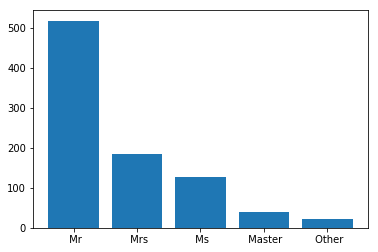

In [176]:
freq=titanic['Title'].value_counts()
freq
len_title = np.arange(len(titanic.Title))
uniq=titanic.Title.unique()
uniq
plt.bar(uniq,freq)

### Age VS Survival Rate

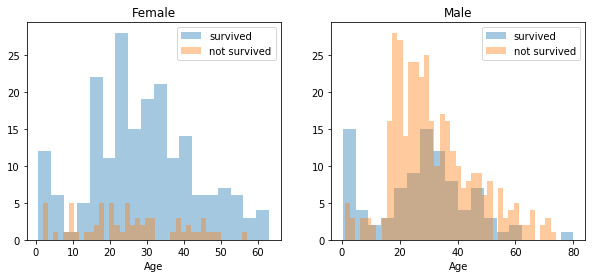

In [177]:

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']==0]
men = titanic[titanic['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')



From the above, you can see that men have a high probability of survival when they are between 18 and 30 years old. This is only sometimes true for women. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

### Embarked VS Survival Rate differentiated on Sex

C:\Users\annjo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


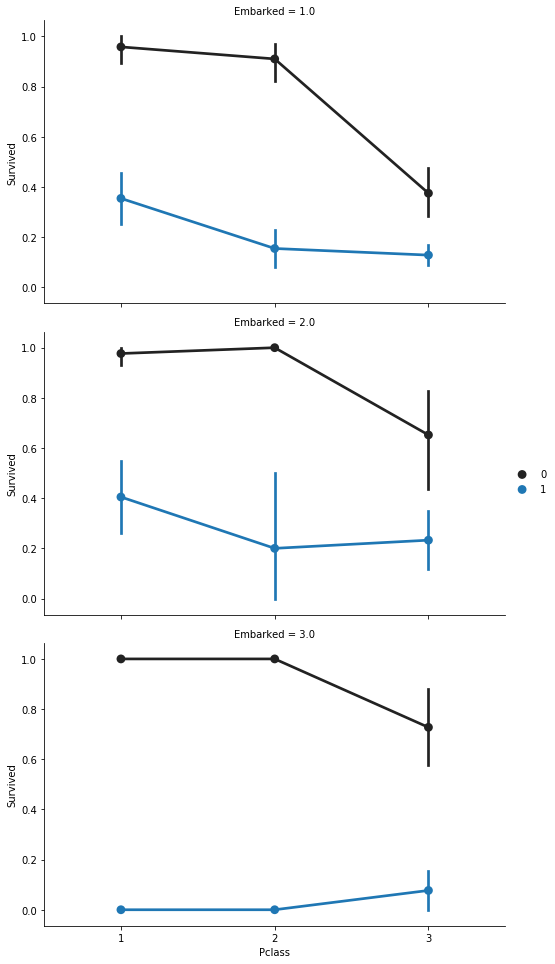

In [178]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

From the above, Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

### Class VS Survival

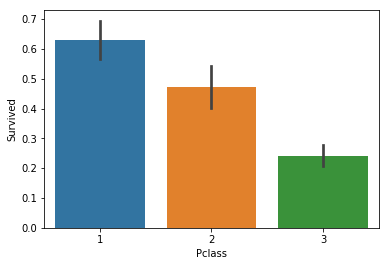

In [179]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

From the above graph and the graphs below, it is obvious that there is a higher chance of survival when the passenger is in the first class versus when they're in the third class. In the graph below, it can be noted that most passengers in the third class did not survive.

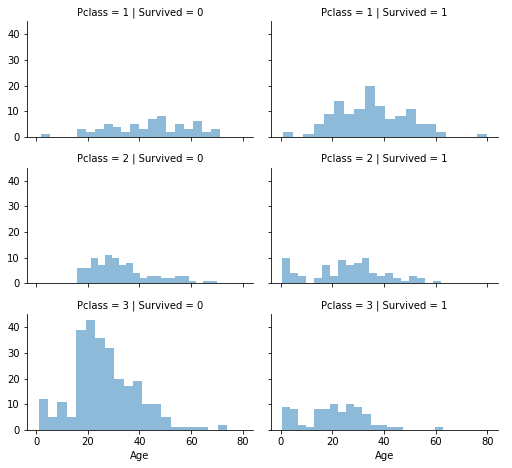

In [180]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Number of relatives VS Survival

C:\Users\annjo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


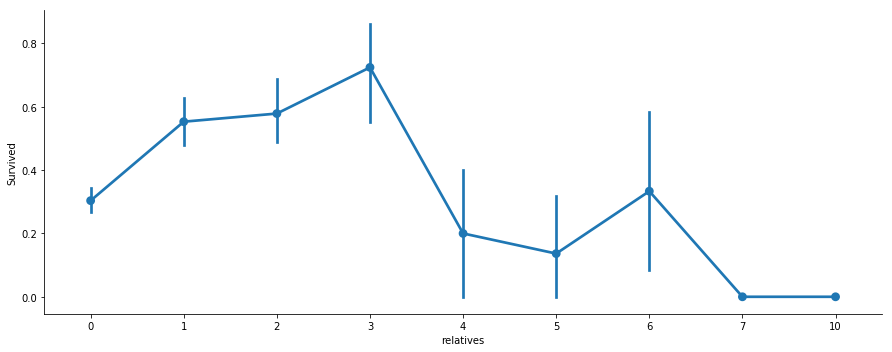

In [181]:
titanic['relatives'] = titanic['SibSp'] + titanic['Parch']
titanic.loc[titanic['relatives'] > 0, 'not_alone'] = 0
titanic.loc[titanic['relatives'] == 0, 'not_alone'] = 1
titanic['not_alone'] = titanic['not_alone'].astype(int)

axes = sns.factorplot('relatives','Survived', 
                      data=titanic, aspect = 2.5, )

From the above, we can see that there is a high probabilty of survival with 1 to 3 relatives, but a lower probability if you had less than 1 or more than 3 (except for some cases with 6 relatives).

## 5. Estimating Missing Values

### Estimating Age

We did this taking the mean of the column.

In [182]:
data = [titanic, test]

for dataset in data:
    mean = titanic["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic["Age"].astype(int)

### Changing blanks in Fare to 0

In [183]:
fill_value = 1
test['Fare'] = test['Fare'].fillna(fill_value)

### Estimating Embarked based on common value

In [184]:
common_value = 1
titanic['Embarked'] = titanic['Embarked'].fillna(common_value)

## 6. One-Hot Encoding

This is done so that the machine learning algorithms do not give a higher values more importance. By changing each categorical variable to multiple binary variables, this can be avoided and each values is treated equally.

In [185]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Pclass_cat = le.fit_transform(titanic.Pclass)
Embarked_cat = le.fit_transform(titanic.Embarked)
Title_cat   = le.fit_transform(titanic.Title)

Pclass_cat_test = le.fit_transform(test.Pclass)
Embarked_cat_test = le.fit_transform(test.Embarked)
Title_cat_test   = le.fit_transform(test.Title)

In [186]:
#initialize the encoded categorical columns
titanic['Pclass_cat'] = Pclass_cat
titanic['Embarked_cat'] = Embarked_cat
titanic['Title_cat'] = Title_cat

test['Pclass_cat'] = Pclass_cat_test
test['Embarked_cat'] = Embarked_cat_test
test['Title_cat'] = Title_cat_test

In [187]:
#drop the old categorical columns from dataframe
dummy_fields = ['Pclass', 'Embarked', 'Title']
titanic = titanic.drop(dummy_fields, axis = 1)
test = test.drop(dummy_fields, axis = 1)

In [188]:
titanic = titanic.reindex_axis(['Survived', 'Pclass_cat', 'Title_cat', 'Sex',
                                    'Age', 'SibSp', 'Parch',
                                     'Fare', 'Embarked_cat'], axis= 1)
test = test.reindex_axis(['PassengerId','Pclass_cat', 'Title_cat', 'Sex',
                                    'Age', 'SibSp', 'Parch',
                                     'Fare', 'Embarked_cat'], axis= 1)

 
test.head(10)

C:\Users\annjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\annjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,PassengerId,Pclass_cat,Title_cat,Sex,Age,SibSp,Parch,Fare,Embarked_cat
0,892,2,2,1,22,0,0,7.8292,2
1,893,2,3,0,38,1,0,7.0000,0
2,894,1,2,1,26,0,0,9.6875,2
3,895,2,2,1,35,0,0,8.6625,0
4,896,2,3,0,35,1,1,12.2875,0
5,897,2,2,1,30,0,0,9.2250,0
6,898,2,4,0,54,0,0,7.6292,2
7,899,1,2,1,2,1,1,29.0000,0
8,900,2,3,0,27,0,0,7.2292,1
9,901,2,2,1,14,2,0,24.1500,0


## 7. Data Slicing

In [189]:
random.seed(777)
train=titanic.sample(frac=0.7,random_state=200)
test1=titanic.drop(train.index)
features=titanic.drop("Survived", axis=1)
target=titanic["Survived"]

features_train = train.drop("Survived", axis=1)
target_train = train["Survived"]
features_test = test1.drop("Survived", axis=1)
target_test = test1["Survived"]


### PCA and GaussianNB for Feature Scaling 

In [190]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(features_train, target_train)
pred_test = unscaled_clf.predict(features_test)

In [191]:
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB(var_smoothing = 0))
std_clf.fit(features_train, target_train)
pred_test_std = std_clf.predict(features_test)

C:\Users\annjo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\annjo\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\annjo\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [192]:
from sklearn import metrics

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(target_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
73.78%



In [193]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']
# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [-8.73973065e-03  2.89336914e-03 -1.78658229e-03  3.14621930e-02
  2.62382848e-03  3.27976081e-03  9.99452064e-01  3.38678304e-04]

PC 1 with scaling:
 [-0.39047449  0.51827668 -0.54577743  0.07613432  0.16755692  0.26348023
  0.41805101  0.05464175]


In [194]:
# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(features_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(features_train))

C:\Users\annjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


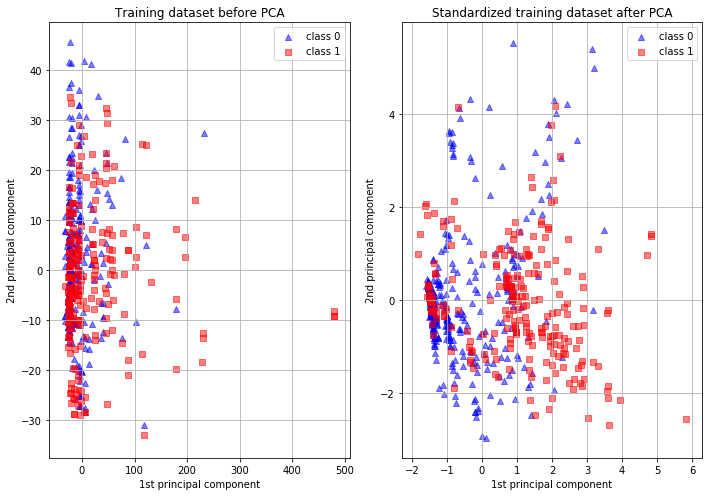

In [195]:
# visualize standardized vs. untouched dataset with PCA performed
FIG_SIZE = (10, 7)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X_train_transformed[target_train == l, 0],
                X_train_transformed[target_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax2.scatter(X_train_std_transformed[target_train == l, 0],
                X_train_std_transformed[target_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset before PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

### Standardization of Data

Standardization is done so that columns with higher values are not given more importance thant columns with lower values. When stardardizing, columns are scaled down to the same size so that they are treated equally.

In [196]:
num_features = ['Pclass_cat', 'Title_cat', 'Sex',
                                    'Age', 'SibSp', 'Parch',
                                     'Fare', 'Embarked_cat']
 
scaled_features = {}
for each in num_features:
    mean, std = titanic[each].mean(), titanic[each].std()
    scaled_features[each] = [mean, std]
    titanic.loc[:, each] = (titanic[each] - mean)/std
for each in num_features:
    mean, std = test[each].mean(), test[each].std()
    scaled_features[each] = [mean, std]
    test.loc[:, each] = (test[each] - mean)/std
    
random.seed(777)
train=titanic.sample(frac=0.7,random_state=200)
test1=titanic.drop(train.index)
features=titanic.drop("Survived", axis=1)
target=titanic["Survived"]

features_train = train.drop("Survived", axis=1)
target_train = train["Survived"]
features_test = test1.drop("Survived", axis=1)
target_test = test1["Survived"]


## 8. Data Modelling and Comparison

### 8.1. Gaussian Naive Bayes 

In a classification problem like the one in this analysis, our hypothesis (h) may be the class to assign for a new data instance (d). One of the easiest ways of selecting the most probable hypothesis given the data that we have is by using it as our prior knowledge about the problem. Bayes' Theorem provides a way to calculate the probability of a hypothesis given our prior knowledge. The Gaussain Naive Bayes will calculate the prior probability P(h) irrespective of the data.

Below, we build our Naive Bayes model and give the accuracy of the model.

In [197]:
random.seed(7777)
gnb = GaussianNB()
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)


In [198]:
from sklearn.metrics import accuracy_score
print('\nPrediction accuracy for the Gaussian Naive Bayes:')
print('{:.2%}\n'.format(metrics.accuracy_score(target_test, target_pred,normalize = True)))


Prediction accuracy for the Gaussian Naive Bayes:
75.28%



### Tuning Naive Bayes

There are two tuning parameters in this model: Prior probability and variable smoothing. The Gaussian Naive Bayes algorithm handles prior probabilities pretty well on its own so we only tuned the parameter, variable smoothing. The var_smoothing at 0.5 gives improvement in the accuracy of the tuned Naive bayes model.

In [199]:
random.seed(7777)
gnb = GaussianNB(var_smoothing = 1)
gnb.fit(features_train, target_train)
target_pred = gnb.predict(features_test)
#accuracy_score(target_test, target_pred, normalize = True)
print('\nPrediction accuracy for the Gaussian Naive Bayes with Variable smoothing=1 ')
print('{:.2%}\n'.format(metrics.accuracy_score(target_test, target_pred,normalize = True)))


Prediction accuracy for the Gaussian Naive Bayes with Variable smoothing=1 
73.41%



In [200]:
from sklearn.model_selection import StratifiedKFold 
random.seed(7777)
#v = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#params = {"var_smoothing" : v}
params = {}
#gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=10)

nb2 = GridSearchCV(GaussianNB(var_smoothing = 0.5), cv=skf, param_grid=params)

In [201]:
nb2.fit(features_train, target_train)

C:\Users\annjo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=0.5),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [202]:
y_pred_nb2 = nb2.predict(features_test)

In [203]:
#print(y_pred_nb2)

# predicted probabilities on the test set
y_scores_nb2 = nb2.predict_proba(features_test)[:, 1]
accuracy_score(target_test,y_pred_nb2,normalize = True)

0.7640449438202247

### Prediction using Test

In [204]:
test_pred = nb2.predict(test.drop('PassengerId',axis = 1))

In [205]:
test_id = test["PassengerId"]
test_Survived = pd.Series(test_pred, name="Survived")

results = pd.concat([test_id,test_Survived],axis=1)

results.to_csv("NB.csv",index=False)

When we submitted this result to Kaggle, we got an accuracy of 77.99% and a rank of 4928.

### 8.2. Perceptron

Perceptron is a single layer neural network and a multi-layer perceptron is called a Neural Networks.
A perceptron is a linear classifier (binary). Also, it is used in supervised learning and helps to classify the given input data.

The perceptron consists of 4 parts:
1. Input values or One input layer
2. Weights and Bias
3. Net sum
4. Activation Function

In a perceptron, all the inputs are multiplied by some weight and passed through the activation function to get an output. In a neural network, there are many hidden layers and multiple activation functions in each layer.
Below, we built a perceptron model.

In [206]:
random.seed(777)
perceptron = Perceptron(max_iter=1000, tol=None)
perceptron.fit(features_train, target_train)
target_pred = perceptron.predict(features_test)
#accuracy_score(target_test, target_pred, normalize = True)
print('\nPrediction accuracy for the Perceptron')
print('{:.2%}\n'.format(metrics.accuracy_score(target_test, target_pred)))


Prediction accuracy for the Perceptron
73.03%



C:\Users\annjo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Tuning the Perceptron

Next, we used a multilayered perceptron. There are many parameters that can be tuned in this type of model like the maximum number of iterartions, the number of hidden layers, the weight of the inputs, etc. Below, a grid search is done to tune each parameter and choose the tuned multilayer perceptron model that is the most accurate.

In [207]:
parameters = {'solver': ['lbfgs'], 'max_iter': [100,200,300,400], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=3)

clf.fit(features, target)
print(clf.score(features, target)) #Accuracy
print(clf.best_params_)

0.8630751964085297
{'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 100, 'random_state': 8, 'solver': 'lbfgs'}


From above, the tuned parameters of the best Perceptron model are can also be seen.

### Prediction using Test Dataset

In [208]:
pred_perceptron = clf.predict(test.drop('PassengerId',axis = 1))
test_id = test["PassengerId"]
test_Survived = pd.Series(pred_perceptron, name="Survived")

results = pd.concat([test_id,test_Survived],axis=1)

results.to_csv("Perceptron.csv",index=False)

When we submitted this result to Kaggle, we got an accuracy of 75%.

### 8.3. Random Forest

Each tree randomly chooses the root node and splits till it reaches the leaf nodes giving 0 or 1 i.e, Does not survive or survives. Choosing higher number of trees will reduce the overfitting issue. Here we used 100 trees to fit the model which seems to be a good choice as it has least out of bag error.  

In [209]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(features_train, target_train)

Y_prediction = random_forest.predict(features_test)

random_forest.score(features_train, target_train)
acc_random_forest = round(random_forest.score(features_train, target_train) * 100, 2)
#acc_random_forest
print('\nPrediction accuracy for the Perceptron',acc_random_forest,'%')
#print('{:.2%}\n'.format(metrics.random_forest.score(features_train, target_train)))


Prediction accuracy for the Perceptron 98.88 %


Even though this accuracy is great, is just the best accuracy. When we look at the average accuracy given by this model, we see the following:

In [210]:
random.seed(7777)
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, features_train, target_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.74603175 0.84126984 0.73015873 0.73015873 0.85714286 0.79365079
 0.79032258 0.83870968 0.83606557 0.83606557]
Mean: 0.7999576104018198
Standard Deviation: 0.04676592942506856


This looks much more realistic than before.

### Feature Importance

Another important features of the Random Forest model is that you can see which predictors are important. From below, we see that predictors Age and Fare are the top two most important variables when trying to determine whether or not a passenger survived.

In [211]:
importances = pd.DataFrame({'feature':features_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.258
Age,0.233
Sex,0.163
Title_cat,0.147
Pclass_cat,0.079
SibSp,0.051
Embarked_cat,0.037
Parch,0.033


### Tuning Random Forest Parameters

There are many parameters that can be tuned in a random forest such as the number of nodes, the maximum number of splits, the number of estimators, etc. These parameters are tuned below to get the random forest with tuned parameters that give the best results.

In [212]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=3)
clf.fit(features_train, target_train)
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 100}


The above shows the tuned parameters of the best random forest model.


In [215]:
print('\nPrediction accuracy for the Random forest after tuning',clf.score(features, target)*100,'%')



Prediction accuracy for the Random forest after tuning 87.99102132435466 %


### Prediction on the Test Dataset

In [216]:
pred_rf = clf.predict(test.drop('PassengerId',axis = 1))
test_id = test["PassengerId"]
test_Survived = pd.Series(pred_rf, name="Survived")

results = pd.concat([test_id,test_Survived],axis=1)

results.to_csv("RandomForest.csv",index=False)

Prediction Accuracy of Random Forest with Test data is : 79%

## 9. Model Comparison and Conlusion

### Accuracy Scores Comparison:

Gaussian Naive Bayes : 78%

Perceptron :75%

Random Forest : 79%

Hence, we conclude that out of the three models that were build, Random forest out performs the other models and this model would be chosen for predicting whether or not a passenger survives.